In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
Image.MAX_IMAGE_PIXELS = None

In [41]:
original_image=np.array(Image.open('/fs5/p_masi/baos1/rudravg/MXIF/MXIF/Helmsley/MxIF/Set02/GCA020TIB/Registered/GCA020TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_00.tif'))
last_image=np.array(Image.open('/fs5/p_masi/baos1/rudravg/MXIF/MXIF/Helmsley/MxIF/Set02/GCA020TIB/Registered/GCA020TIB_TISSUE01_DAPI_DAPI_12ms_ROUND_18.tif'))



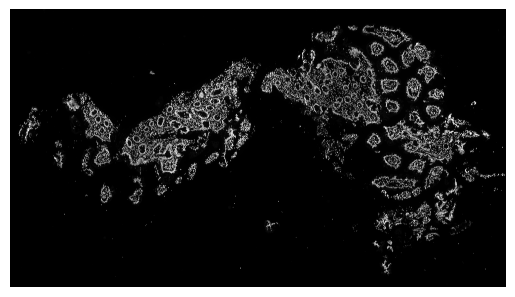

In [51]:
#Show original image as grayscale
plt.imshow(original_image, cmap='gray')
plt.axis('off')
plt.savefig('original_image.pdf')

In [42]:
# Calculate the size of the padding needed
height, width = original_image.shape
patch_size = 1024
overlap = 200

# Calculate the number of patches along each dimension
num_patches_height = np.ceil(height / (patch_size - overlap))
num_patches_width = np.ceil(width / (patch_size - overlap))

# Calculate the total size needed along each dimension
total_height = (num_patches_height * (patch_size - overlap)) + overlap
total_width = (num_patches_width * (patch_size - overlap)) + overlap

# Calculate the size of the padding needed along each dimension
pad_height = int(total_height - height)
pad_width = int(total_width - width)

# Add padding to the image
padded_image = np.pad(original_image, ((0, pad_height), (0, pad_width)))

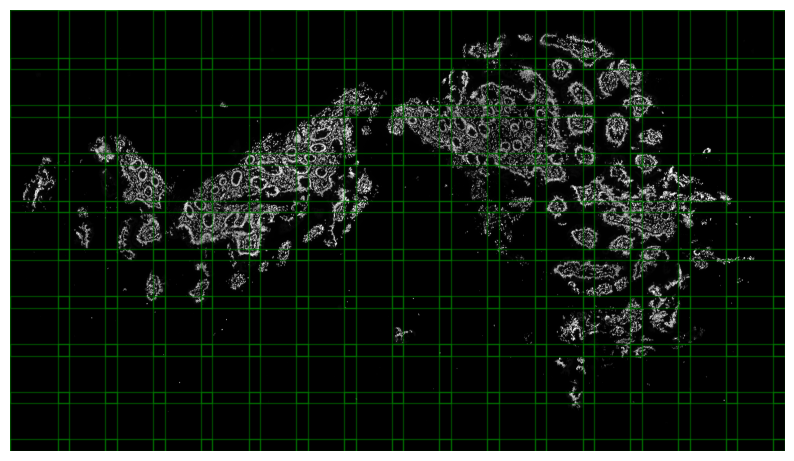

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Display the image
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(padded_image, cmap='gray')

# Hide the axes
ax.axis('off')

# Calculate the number of patches along each dimension
num_patches_height = int(np.ceil(padded_image.shape[0] / (patch_size - overlap)))
num_patches_width = int(np.ceil(padded_image.shape[1] / (patch_size - overlap)))

# Add the grids
for i in range(num_patches_height):
    for j in range(num_patches_width):
        y = i * (patch_size - overlap)
        x = j * (patch_size - overlap)
        rect = patches.Rectangle((x, y), patch_size, patch_size, linewidth=1, edgecolor='g', facecolor='none', alpha=0.5)
        ax.add_patch(rect)

# Display the plot
plt.savefig('overlapping_original_image_last.pdf')
plt.show()


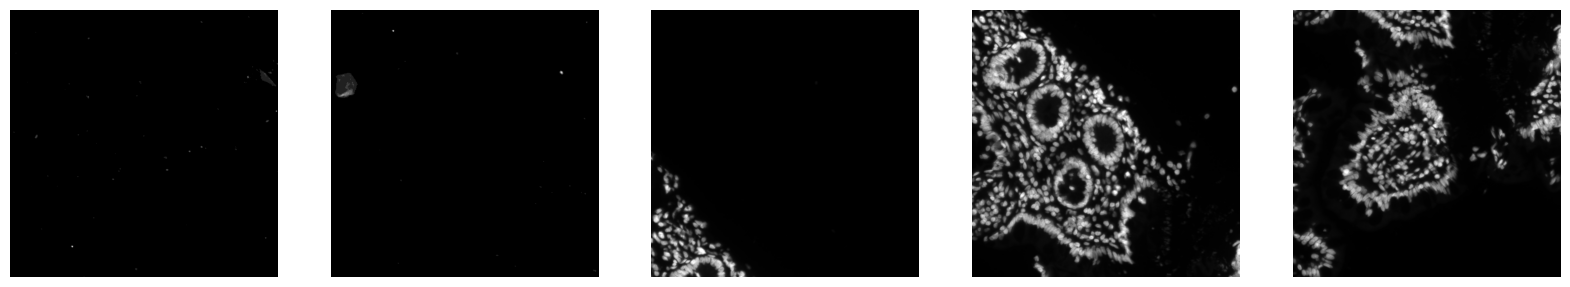

In [45]:
#Show 5 patches from the image. Not random
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    y = i * (patch_size - overlap)
    x = 2000
    patch = padded_image[y:y + patch_size, x:x + patch_size]
    ax[i].imshow(patch, cmap='gray')
    ax[i].axis('off')

plt.savefig('overlapping_original_image_first_patches.pdf')


#Save the 3rd and 4th patches as numpy arrays
y = 2 * (patch_size - overlap)
x = 2000
patch3 = padded_image[y:y + patch_size, x:x + patch_size]
y = 3 * (patch_size - overlap)
x = 2000
patch4 = padded_image[y:y + patch_size, x:x + patch_size]

np.save('patch3_last.npy', patch3)
np.save('patch4_last.npy', patch4)


In [47]:
patch3_orig=np.load('patch3_orig.npy')
patch3_last=np.load('patch3_last.npy')

patch4_orig=np.load('patch4_orig.npy')
patch4_last=np.load('patch4_last.npy')
